# Hilbert Transform 

An analysis of the hilbert transform of the equation using the Rational Eigenfunction Expansion Method: 

$$Z(\tau, \omega)= \frac{1}{1+(\omega\tau)^2}$$

with an algorithm developed by Andre Weideman. This will be in respect to $\omega$ for values of $\tau$ ranging from $\tau=10^{-3},10^{-2}...10^3$, with a hilbert transform output in the range of:

In [1]:
import numpy as np
omega_vec = np.logspace(4, -4, 81, endpoint=True)

The following function is the original algorithm designed to compute the hilbert transform of a function, modified slightly to accomodate the above equation. The parameters below, namely _N_, will be used in the following code to define the set and number of collocation points that will be taken as inputs to return hilbert transform values of the original function. The _b_ value is a scaling parameter, and choosing the optimal value requires a certain amount of trial and error which will be explored later. _y_ determines the value of the exponent of 10 and thus the value of $\tau$.

In [2]:
def hilb2(N, b, y):                                
    n = np.array(range(-N,N))                      # number of terms in the expansion
    x = b*np.tan(np.pi*(n+(1/2))/(2*N))            # set of collocation points
    f = np.array(1/(1+((10**y)*x)**2))             # Z function   
    x.flatten()                                   
    f.flatten()                                    # ensures that x and F are column vectors     
    
    a = np.fft.fftshift(np.fft.fft(f*(b-1j*x)))
    h = np.fft.ifft(np.fft.fftshift(1j*(np.sign(n+1/2)*a)))/(b-1j*x) # algorithm values
    
    return(x, h.real, b, N)                        # returns x values and corresponding approximated ht values

This function returns exact hilbert transform values of the original _Z_ function using the literature equivalent found in Volume 2 of Hilbert Transforms by Frederick W. King:
$$-x(x^2+a^2)^{-1}$$
where _x_ is equal to $\omega\tau$ and _a_ is equal to 1.

In [3]:
def exactht(y):
    omega = []
    xx = []
    
    for i in range(len(omega_vec)):
        w = omega_vec[i]
        omega.append(w)            # omega values in specified range
        
        a = w*(10**y)
        exact_values = -a*((1+a**2)**(-1))    # exact values
        xx.append(exact_values)
    
    return(omega, xx, y)          # returns omega values and exact hilbert transform values, and y for plotting

To find an optimum value of _b_ based on a designated number of collocation points determined by _N_, the following code was used. The mean squared error between the algorithm values and exact values was the statistical measurement utilised. The table below showes the optimum b value for each corresponding input of _y_ and _N_ with _N_ being 64, 128, 256, and 512.

In [4]:
def optb(ht, N, y):
     
     mse = 999999
     
     for i in range(1,1000):              # determines optimum b value up to 1000
         exact_values = []
         approx_values = ht(N, i, y)[1]   # uses code in [2] to apply algorithm values
         
         if ht(N, i, y)[0][2*N-1] >=10**4: # if the b value causes the x value to exceed
             break                         # 10^4 or the range of omega, it is excluded
                
         for s in range(len(ht(N, i, y)[0])):
            w = ht(N, i, y)[0][s]
            a = w*(10**y)
            l_val = -a*((1+a**2)**(-1))    # computes exact values
            
            exact_values.append(l_val)
            
         difference_array = np.subtract(approx_values, exact_values)
         squared_array = np.square(difference_array)
         similarity = squared_array.mean() # computes MSE
            
         if abs(similarity) < mse:         # determines b value with lowest resulting MSE
            mse = similarity
            optimal_b = i
   
     print("The optimal b value is b=" + str(optimal_b) + " with MSE = " + str(mse))
   
     return(optimal_b)

|y value|N value|Optimal b value|MSE    |
|-------|-------|---------------|-------|
|-3     |64     |122            |7.9e-14|
|-3     |128    |61             |9.6e-14|
|-3     |256    |30             |1.7e-13|
|-3     |512    |15             |1.8e-13|
|-2     |64     |121            |5.6e-33|
|-2     |128    |61             |1.4e-33|
|-2     |256    |28             |2.9e-32|
|-2     |512    |15             |6.1e-32|
|-1     |64     |28             |4.0e-33|
|-1     |128    |52             |2.7e-33|
|-1     |256    |24             |4.8e-33|
|-1     |512    |14             |8.2e-33|
|0      |64     |3              |3.3e-33|
|0      |128    |5              |2.5e-33|
|0      |256    |13             |1.6e-33|
|0      |512    |15             |1.5e-33|
|1      |64     |1              |1.4e-12|
|1      |128    |1              |9.7e-24|
|1      |256    |1              |2.2e-33|
|1      |512    |2              |1.3e-33|
|2      |64     |122            |8.4e-07|
|2      |128    |61             |6.6e-06|
|2      |256    |1              |7.1e-07|
|2      |512    |1              |2.5e-11|
|3      |64     |122            |8.5e-09|
|3      |128    |61             |6.8e-08|
|3      |256    |30             |5.6e-07|
|3      |512    |15             |4.2e-06|

From this, all the necessary parameters are available  for plotting:

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
def hplot(ht1, ht2):                                                    # Plot hilbert transform graphs
    plt.xscale('log')
    
      
    plt.plot(                                                           # Approximate transform values
        ht1[0], ht1[1], 
        linestyle="None", marker='o', markerfacecolor='None',  
        markeredgecolor='black', markeredgewidth='0.5',label="Numerical"
    )                                                           
    
    plt.plot(                                                           # Exact transform values
        ht2[0], ht2[1], 
        'black', label="Analytical"
    )                                                           

    plt.title("Hilbert Transform of $Z=1/(1+10^{" + str(ht2[2]) + "}*\omega$)")
    plt.xlabel("$\omega$")
    plt.ylabel("h")
    plt.legend(loc='upper left')
    plt.figtext(0.99, 0.01, 'b='+ str(ht1[2]) + ', N=' + str(ht1[3]), horizontalalignment='right')
 
    plt.grid(which='major', linestyle='-', linewidth=1)

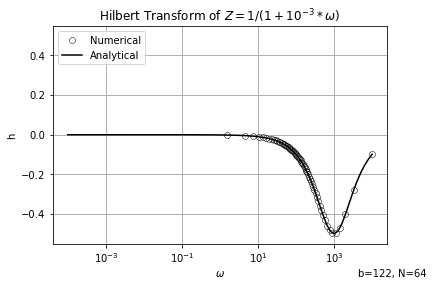

In [6]:
hplot(hilb2(64, 122, -3), exactht(-3)) # Plotting the hilbert transform of Z when y = -3, with 64 collocation points

For error analysis, the following functions were written to calculate and then plot the residual:

In [7]:
def resid_calc(ht, N, b, y):
    resid_values = []
    approx_values = ht(N, b, y)[1]                 # algorithm values
         
    for i in range(len(ht(N, b, y)[0])):
        w = ht(N, b, y)[0][i]
        a = w*(10**y)
        l_val = -a*((1+a**2)**(-1))       # computes exact values
            
        residual = abs(approx_values[i]-l_val)  # computes residual  
        resid_values.append(residual)
            
    return(resid_values, y, b, N)

In [8]:
def resplot(x, resid_calc): # plot residual graphs using resid_calc function
    plt.xscale('log')
    plt.yscale('log')
    
    plt.plot(
         x, resid_calc[0], linestyle="None", marker='.', markerfacecolor="None", # Create plot
         markeredgecolor='navy', markeredgewidth=0.5 
    )
    
    plt.title("Residual Plot of $Z=1/(1+10^{" + str(resid_calc[1]) + "}*\omega$)")
    plt.xlabel("$\omega$")
    plt.ylabel("Residual of h")
    plt.grid(which='major', linestyle='-', linewidth=1)
    plt.figtext(0.99, 0.01, 'b='+ str(resid_calc[2]) + ', N=' + str(resid_calc[3]), horizontalalignment='right')

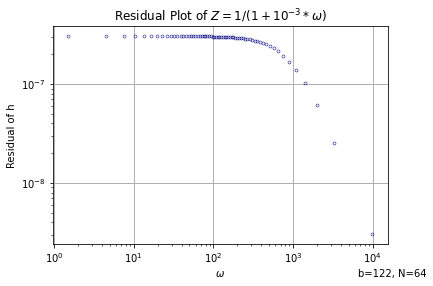

In [9]:
resplot(hilb2(64, 122, -3)[0], resid_calc(hilb2, 64, 122, -3)) # Plotting residuals of transform of the same values